This notebook aims at processing the original Ra dataset to a more specific one.

## Step 1 - Preparations

First we need to import some packages.

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os

Then we define function `view_dataset` to view the shape of a dataset.

In [2]:
def _print_hdf5(name, obj):
    indent = "  " * name.count("/")
    if isinstance(obj, h5py.Dataset):
        print(f"{indent}[Dataset] {name} shape={obj.shape} dtype={obj.dtype}")
    elif isinstance(obj, h5py.Group):
        print(f"{indent}[Group]   {name}")

def view_dataset(dataset_path):
    with h5py.File(dataset_path, "r") as f:
        f.visititems(_print_hdf5)


## Step 2 - Load and visualize the dataset

Set `dataset_path` and `new_dataset_path` as the paths of the original and new dataset.

Display the structure of the original dataset.

In [3]:
# Paths
dataset_path = "/home/ubuntu/Desktop/Ra/datasets/Ra_128.h5"
new_dataset_path = "/home/ubuntu/Desktop/Ra/datasets/Ra_128_indexed_decimal_2.h5"

# Path
if not os.path.exists(os.path.dirname(new_dataset_path)):
    os.makedirs(os.path.dirname(new_dataset_path), exist_ok=True)

# View the original dataset
view_dataset(dataset_path)

[Dataset] image_names shape=(9192,) dtype=object
[Dataset] images shape=(9192, 128, 128, 3) dtype=uint8
[Dataset] index_train shape=(0,) dtype=float64
[Dataset] index_valid shape=(0,) dtype=float64
[Dataset] labels shape=(9192,) dtype=float64
[Dataset] tool_wears shape=(9192,) dtype=float64
[Dataset] types shape=(9192,) dtype=int32


From the above output we can see some `numpy` arrays are inside the dataset, including the important ones:

1. `images`: includes all the images data
2. `labels`: include all the labels regarding the images
3. `types`: include all the types regarding the images

We have to read and store these three `numpy` arrays.

In [4]:
with h5py.File(dataset_path, "r") as f:
    images = f["images"][:]
    labels = f["labels"][:]
    types = f["types"][:]

## Step 3 - Process the data

We process the datasets according to our requirements.

In [5]:
# Print old labels
print(f"Old labels (3 decimals): {labels}")

# Add codes here
N = images.shape[0]
labels = np.round(labels, decimals = 2)
index_train = list(range(0, N, 2))
index_valid = list(range(1, N, 2))

# Print new labels
print(f"New labels (2 decimals): {labels}")
print(f"Unique labels num: {len(np.unique(labels))}")

Old labels (3 decimals): [1.349 1.349 1.349 ... 5.177 5.177 5.177]
New labels (2 decimals): [1.35 1.35 1.35 ... 5.18 5.18 5.18]
Unique labels num: 284


We also want to visualize the distribution of the processed `labels`.

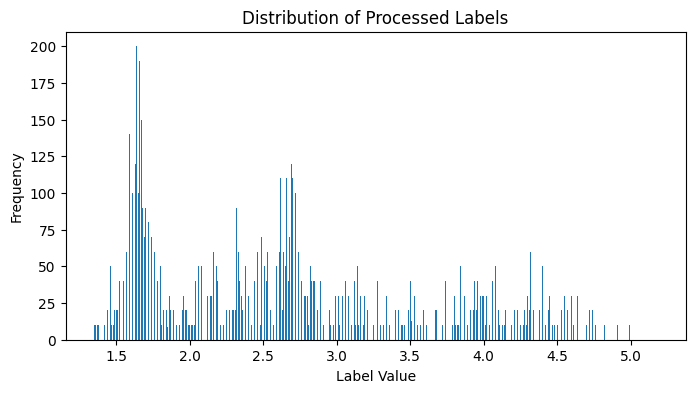

In [6]:
plt.figure(figsize=(8, 4))
unique_labels, counts = np.unique(labels, return_counts=True)
plt.bar(unique_labels, counts, width = 0.005)
plt.xlabel('Label Value')
plt.ylabel('Frequency')
plt.title('Distribution of Processed Labels')
plt.show()

## Step 4 - Construct and output the new dataset

Now that we have everything for constructing the new dataset, we come to the last step.

In [7]:
with h5py.File(new_dataset_path, "w") as f:
    f.create_dataset("images", data=images)
    f.create_dataset("labels", data=labels)
    f.create_dataset("types", data=types)
    f.create_dataset("index_train", data=index_train)
    f.create_dataset("index_valid", data=index_valid)

We can also view the structure of the new dataset.

In [8]:
view_dataset(new_dataset_path)

[Dataset] images shape=(9192, 128, 128, 3) dtype=uint8
[Dataset] index_train shape=(4596,) dtype=int64
[Dataset] index_valid shape=(4596,) dtype=int64
[Dataset] labels shape=(9192,) dtype=float64
[Dataset] types shape=(9192,) dtype=int32
